## Descriptive Statistics

In this section we will 
- calculate and analyse summary statistics such as mean, median, standard deviation, min/max 
- analyse skewness and kurtosis

Information and inspiration about skewness and kurtosis were found [here](https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis).

**Author:** Nazgul Sagatova  
**Last updated:** 2025-12-1 

Previous notebook:

[[01-download-and-data-wrangling.ipynb](01-download-and-data-wrangling.ipynb)


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Load the dataset complete from data wrangling
from utils import load_caribbean_weather

df = load_caribbean_weather()

In [54]:
df.head()

,temp_anomaly,precip,year,month
0,0.29,44.59,1980,1
1,0.31,79.07,1980,2
2,0.28,99.58,1980,3
3,0.29,155.65,1980,4
4,0.35,256.91,1980,5


## Basic Statistics

In [10]:
#Basic stats using describe for each attribute 
bstats = df[['temp_anomaly', 'precip']].describe()
print(bstats)

       temp_anomaly       precip
count    550.000000   550.000000
mean       0.471727   409.282509
std        0.332367   306.621663
min       -0.120000    25.380000
25%        0.230000   122.200000
50%        0.410000   352.565000
75%        0.697500   664.312500
max        1.500000  1190.270000


Text(0.5, 0.98, 'Caribbean temperature anomaly and precipitation basic statistics')

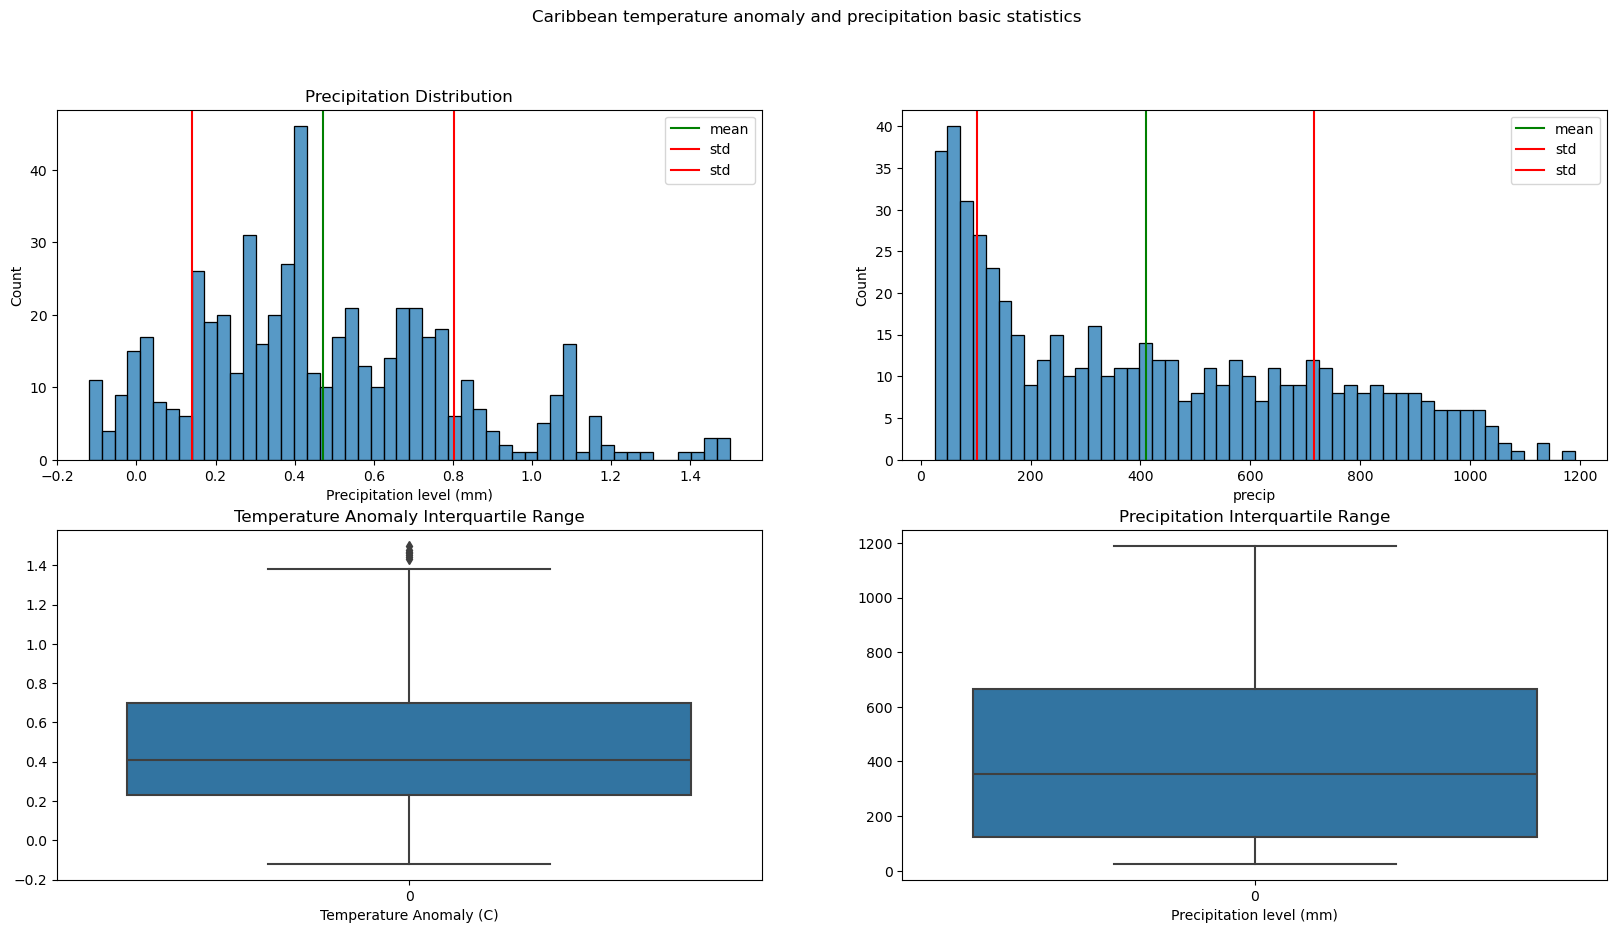

In [42]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,sharey=False, figsize = (20,10))

sns.histplot(df['temp_anomaly'], bins=50, ax=ax1)
ax1.set_title('Temperature Anomaly Distribution')
ax1.set_xlabel('Temperature Anomaly (C)')

sns.histplot(df['precip'], bins=50, ax=ax2)
ax1.set_title('Precipitation Distribution')
ax1.set_xlabel('Precipitation level (mm)')

#Let's add basic stats to the plot 

#Find basic stats for temperature anomaly
temp_mean = bstats.loc['mean']['temp_anomaly']
temp_std = bstats.loc['std']['temp_anomaly']

#Add vertical mean and std lines to the plot
ax1.axvline(temp_mean, color = 'green', label='mean')
ax1.axvline(temp_mean - temp_std, color='red', label='std')
ax1.axvline(temp_mean + temp_std,color = 'red', label='std')

ax1.legend()

# Find basic stats for precipitation
precip_mean = bstats.loc['mean']['precip']
precip_std = bstats.loc['std']['precip']

#Add vertical mean and std lines to the plot
ax2.axvline(precip_mean,color = 'green', label='mean')
ax2.axvline(precip_mean - precip_std, color = 'red', label='std')
ax2.axvline(precip_mean + precip_std, color = 'red', label='std')

ax2.legend()

#Plot boxplots to see quartiles

sns.boxplot(df['temp_anomaly'], ax=ax3)
ax3.set_title('Temperature Anomaly Interquartile Range')
ax3.set_xlabel('Temperature Anomaly (C)')

sns.boxplot(df['precip'], ax=ax4)
ax4.set_title('Precipitation Interquartile Range')
ax4.set_xlabel('Precipitation level (mm)')

f.suptitle('Caribbean temperature anomaly and precipitation basic statistics')


## Detailed Statistics: Skewness and Kurtosis

In [45]:
stats = pd.DataFrame({
    'skew' : df[['temp_anomaly', 'precip']].apply(skew),
    'kurtosis' : df[['temp_anomaly', 'precip']].apply(kurtosis)
})

print(stats)

                  skew  kurtosis
temp_anomaly  0.572129  0.049067
precip        0.483847 -0.992451


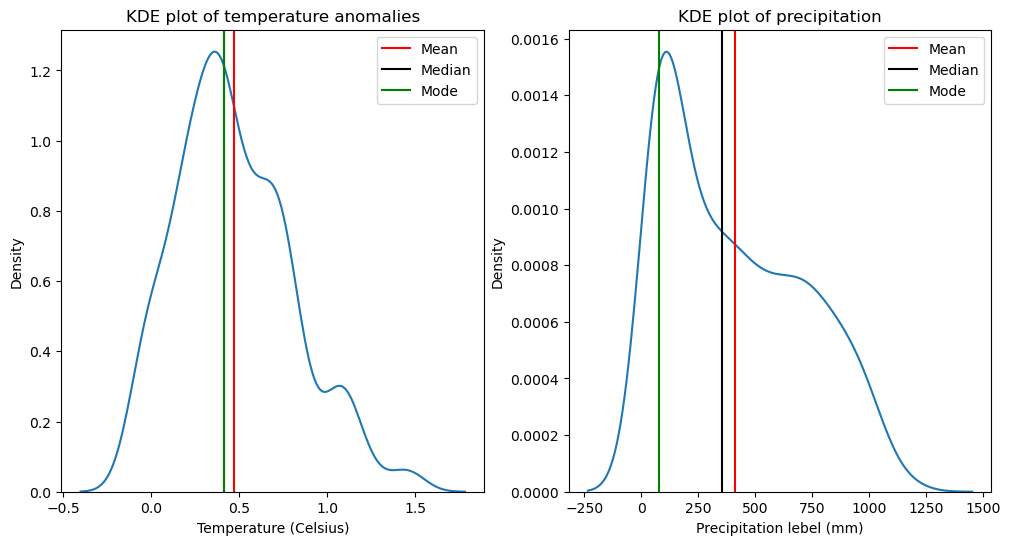

In [53]:
#Plotting the skewness and kurtosis

from statistics import mode

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (12, 6))

sns.kdeplot(df['temp_anomaly'], ax = ax1)
ax1.set_title("KDE plot of temperature anomalies")
ax1.set_xlabel("Temperature (Celsius)")

sns.kdeplot(df['precip'], ax = ax2)
ax2.set_title("KDE plot of precipitation")
ax2.set_xlabel("Precipitation lebel (mm)")

#Let's add the mean, median and mode to plots to see clearer stats

# Find the mean, median, mode for temperature anomaly
mean_temp = df["temp_anomaly"].mean()
median_temp = df["temp_anomaly"].median()
mode_temp = mode(df["temp_anomaly"])

# Add vertical lines at the position of mean, median, mode
ax1.axvline(mean_temp, color= 'red', label="Mean")
ax1.axvline(median_temp, color="black", label="Median")
ax1.axvline(mode_temp, color="green", label="Mode")

ax1.legend()

# Find the mean, median, mode for precipitation
mean_pcp = df["precip"].mean()
median_pcp = df["precip"].median()
mode_pcp = mode(df["precip"])

# Add vertical lines at the position of mean, median, mode
ax2.axvline(mean_pcp, color = 'red', label="Mean")
ax2.axvline(median_pcp, color="black", label="Median")
ax2.axvline(mode_pcp, color="green", label="Mode")

ax2.legend()

## Descriptive Statistics Insights

**Basic stats: Key observations**:
- The dataset contains **550 complete observations** for all numerical variables (no missing values in temp_anomaly and precip columns.
- Temperature anomaly column ranges from **{-0.12}** to **{1.5}**, with a mean of **{0.47}** and a standard deviation of **{0.33}**, indicating high variability (std approx. 70% 0f mean ).
- The median (**{50%}**) of precipitation is lower than the mean (**{mean}**), suggesting a right-skewed distribution.
- The interquartile range (IQR) for precipitation suggests that there were few occurences of heavy rain.
- Potential outliers may exist in temperature anomaly given the large gap between the 75th percentile and the maximum value.
-Temperature anomaly mean = 0.5, precipitation mean = 409. The two features have different magnitudes.

**Detailed stats: key observations**

- Skewness

The temperature anomaly skewness of 0.57 indicates that the data is almost symmetric (zero skewness usually between -0.5 and 0.5). This is shown in the left subplot above, the mean, median and mode almost overlap, nearing the normal distribution. The normal skewness proves the absence of extreme temperature changes on Caribbean Islands as it is summer the whole year.

The precipitation skewness of 0.48 indicates a zero skewness as well. However, is we look at the plot on the right, we can observe a positive skewness. In the case of precipitation, this means less frequent rains, but occasional less frequent showers that pull the mean to the mean higher than the median.

- Kurtosis

Kurtosis of the Anomaly looks Mesokurtic (kurtosis near 0): the distribution indeed resembles normal distribution (as supported by almost zero skewness). Kurtosis in weather data analysis assesses the probability of extreme weather conditions. Temperature-wise Caribbean Islands do not experience extreme temperature fluctuations throughout the year.

Kurtosis of Pcp, on the other hand is High Kurtosis i.e. Leptokurtic: high peak and heavier tails. In weather data, this means that there is a greater concentration of values around the mean and higher likelihood of extreme, rare events. These stats are describing heavy rains during hurricanes and tropical storms.

- Further Climate Change Analysis

Study changes in the kurtosis of temperature and precipitation patterns over time to understand how climate change is affecting the frequency and intensity of extreme events. 

